### Name : Shobhit Mirjankar
### Batch : C32
### Roll No : 1902101

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('churn.csv')
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# EDA

print('Columns : ',list(dataset.columns))
print()
print('Number of missing values : ',dataset.isnull().sum().sum())
print()
dataset.describe()

Columns :  ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Number of missing values :  0



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
# Data Analysis

print(dataset['Geography'].unique())
print(dataset['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [5]:
# Data Preprocessing

le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

dataset = pd.get_dummies(dataset,columns = ['Geography'])
dataset

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [6]:
dataset[['Geography_France','Geography_Germany',
         'Geography_Spain','EstimatedSalary','Exited']]

,Geography_France,Geography_Germany,Geography_Spain,EstimatedSalary,Exited
0,1,0,0,101348.88,1
1,0,0,1,112542.58,0
2,1,0,0,113931.57,1
3,1,0,0,93826.63,0
4,0,0,1,79084.10,0
...,...,...,...,...,...
9995,1,0,0,96270.64,0
9996,1,0,0,101699.77,0
9997,1,0,0,42085.58,1
9998,0,1,0,92888.52,1


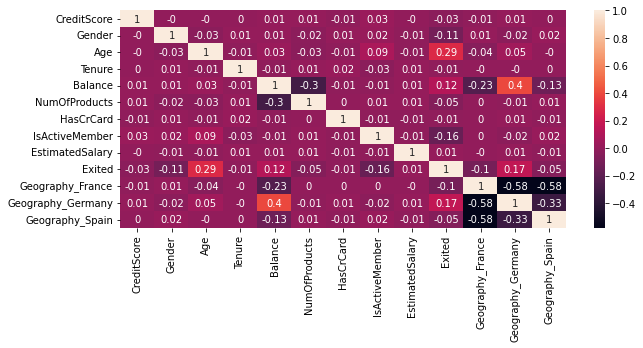

In [7]:
# Feature Importance

plt.figure(figsize=(10, 4))
correl_matrix = dataset.corr().round(2)
sns.heatmap(data=correl_matrix, annot=True)
plt.show()

Hence we can see that most important features for predicting class label 'Exited' are : Age, Geography_Germany, isActiveMember, Balance, Gender

In [8]:
X = dataset[['Age','Geography_Germany','IsActiveMember','Balance','Gender']]
y = dataset['Exited']

X

,Age,Geography_Germany,IsActiveMember,Balance,Gender
0,42,0,1,0.00,0
1,41,0,1,83807.86,0
2,42,0,0,159660.80,0
3,39,0,0,0.00,0
4,43,0,1,125510.82,0
...,...,...,...,...,...
9995,39,0,0,0.00,1
9996,35,0,1,57369.61,1
9997,36,0,1,0.00,0
9998,42,1,0,75075.31,1


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                        random_state=13)
X_train

,Age,Geography_Germany,IsActiveMember,Balance,Gender
4847,23,0,1,104822.45,0
9992,36,0,0,0.00,1
4621,43,0,0,115643.58,1
5774,31,1,0,117020.08,1
9294,36,0,1,133889.35,1
...,...,...,...,...,...
5876,39,0,0,111525.02,1
866,38,0,1,88293.13,1
7696,39,1,1,125997.22,0
74,36,0,1,0.00,1


In [35]:
# Scaling

scaler = MinMaxScaler()
X_train[['Age','Balance']] = scaler.fit_transform(
    X_train[['Age','Balance']])
X_test[['Age','Balance']] = scaler.transform(
    X_test[['Age','Balance']])
X_train

,Age,Geography_Germany,IsActiveMember,Balance,Gender
4847,0.067568,0,1,0.439714,0
9992,0.243243,0,0,0.000000,1
4621,0.337838,0,0,0.485107,1
5774,0.175676,1,0,0.490882,1
9294,0.243243,0,1,0.561646,1
...,...,...,...,...,...
5876,0.283784,0,0,0.467831,1
866,0.270270,0,1,0.370376,1
7696,0.283784,1,1,0.528539,0
74,0.243243,0,1,0.000000,1


# SVM - RBF

In [12]:
svc_rbf1 = SVC(kernel='rbf',random_state=13,C=1)
svc_rbf1.fit(X_train,y_train)
y_pred_rbf1 = svc_rbf1.predict(X_test)

print('Model performance on Training Set : \n')
print(classification_report(y_train,svc_rbf1.predict(X_train)))
print()
print()
print('Model performance on Test Set : \n')
print(classification_report(y_test,y_pred_rbf1))
print()
print()

Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5591
           1       0.81      0.21      0.33      1409

    accuracy                           0.83      7000
   macro avg       0.82      0.60      0.62      7000
weighted avg       0.83      0.83      0.79      7000



Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2372
           1       0.85      0.20      0.32       628

    accuracy                           0.82      3000
   macro avg       0.83      0.60      0.61      3000
weighted avg       0.83      0.82      0.78      3000





In [13]:
svc_rbf2 = SVC(kernel='rbf',random_state=13,C=10)
svc_rbf2.fit(X_train,y_train)
y_pred_rbf2 = svc_rbf2.predict(X_test)

print('Model performance on Training Set : \n')
print(classification_report(y_train,svc_rbf2.predict(X_train)))
print()
print()
print('Model performance on Test Set : \n')
print(classification_report(y_test,y_pred_rbf2))
print()
print()

Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      5591
           1       0.81      0.24      0.37      1409

    accuracy                           0.84      7000
   macro avg       0.82      0.61      0.64      7000
weighted avg       0.83      0.84      0.80      7000



Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2372
           1       0.84      0.23      0.36       628

    accuracy                           0.83      3000
   macro avg       0.83      0.61      0.63      3000
weighted avg       0.83      0.83      0.79      3000





In [14]:
svc_rbf3 = SVC(kernel='rbf',random_state=13,C=100)
svc_rbf3.fit(X_train,y_train)
y_pred_rbf3 = svc_rbf3.predict(X_test)

print('Model performance on Training Set : \n')
print(classification_report(y_train,svc_rbf3.predict(X_train)))
print()
print()
print('Model performance on Test Set : \n')
print(classification_report(y_test,y_pred_rbf3))
print()
print()

Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      5591
           1       0.80      0.25      0.38      1409

    accuracy                           0.84      7000
   macro avg       0.82      0.62      0.64      7000
weighted avg       0.83      0.84      0.80      7000



Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2372
           1       0.84      0.23      0.36       628

    accuracy                           0.83      3000
   macro avg       0.83      0.61      0.63      3000
weighted avg       0.83      0.83      0.79      3000





Conclusion : Best SVM with RBF kernel obtained by setting C=10 or C=100

# SVM - Polynomial

In [15]:
svc_poly1 = SVC(kernel='poly',random_state=13,C=1)
svc_poly1.fit(X_train,y_train)
y_pred_poly1 = svc_poly1.predict(X_test)

print('Model performance on Training Set : \n')
print(classification_report(y_train,svc_poly1.predict(X_train)))
print()
print()
print('Model performance on Test Set : \n')
print(classification_report(y_test,y_pred_poly1))
print()
print()

Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5591
           1       0.80      0.18      0.29      1409

    accuracy                           0.83      7000
   macro avg       0.81      0.58      0.60      7000
weighted avg       0.82      0.83      0.78      7000



Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2372
           1       0.83      0.16      0.27       628

    accuracy                           0.82      3000
   macro avg       0.82      0.57      0.58      3000
weighted avg       0.82      0.82      0.76      3000





In [16]:
svc_poly2 = SVC(kernel='poly',random_state=13,C=10)
svc_poly2.fit(X_train,y_train)
y_pred_poly2 = svc_poly2.predict(X_test)

print('Model performance on Training Set : \n')
print(classification_report(y_train,svc_poly2.predict(X_train)))
print()
print()
print('Model performance on Test Set : \n')
print(classification_report(y_test,y_pred_poly2))
print()
print()

Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5591
           1       0.80      0.21      0.33      1409

    accuracy                           0.83      7000
   macro avg       0.81      0.60      0.62      7000
weighted avg       0.82      0.83      0.79      7000



Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2372
           1       0.86      0.19      0.32       628

    accuracy                           0.82      3000
   macro avg       0.84      0.59      0.61      3000
weighted avg       0.83      0.82      0.78      3000





In [17]:
svc_poly3 = SVC(kernel='poly',random_state=13,C=100)
svc_poly3.fit(X_train,y_train)
y_pred_poly3 = svc_poly3.predict(X_test)

print('Model performance on Training Set : \n')
print(classification_report(y_train,svc_poly3.predict(X_train)))
print()
print()
print('Model performance on Test Set : \n')
print(classification_report(y_test,y_pred_poly3))
print()
print()

Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5591
           1       0.79      0.22      0.34      1409

    accuracy                           0.83      7000
   macro avg       0.81      0.60      0.62      7000
weighted avg       0.83      0.83      0.79      7000



Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2372
           1       0.86      0.20      0.33       628

    accuracy                           0.83      3000
   macro avg       0.84      0.60      0.61      3000
weighted avg       0.83      0.83      0.78      3000





Conclusion : Best SVM with Polynomial kernel obtained by setting C=100

# SVM - Linear 

In [18]:
svc_lin1 = SVC(kernel='linear',random_state=13,C=1)
svc_lin1.fit(X_train,y_train)
y_pred_lin1 = svc_lin1.predict(X_test)

print('Model performance on Training Set : \n')
print(classification_report(y_train,svc_lin1.predict(X_train)))
print()
print()
print('Model performance on Test Set : \n')
print(classification_report(y_test,y_pred_lin1))
print()
print()

Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5591
           1       0.00      0.00      0.00      1409

    accuracy                           0.80      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.64      0.80      0.71      7000



Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2372
           1       0.00      0.00      0.00       628

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000





In [19]:
svc_lin2 = SVC(kernel='linear',random_state=13,C=10)
svc_lin2.fit(X_train,y_train)
y_pred_lin2 = svc_lin2.predict(X_test)

print('Model performance on Training Set : \n')
print(classification_report(y_train,svc_lin2.predict(X_train)))
print()
print()
print('Model performance on Test Set : \n')
print(classification_report(y_test,y_pred_lin2))
print()
print()

Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5591
           1       0.00      0.00      0.00      1409

    accuracy                           0.80      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.64      0.80      0.71      7000



Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2372
           1       0.00      0.00      0.00       628

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000





In [20]:
svc_lin3 = SVC(kernel='linear',random_state=13,C=100)
svc_lin3.fit(X_train,y_train)
y_pred_lin3 = svc_lin3.predict(X_test)

print('Model performance on Training Set : \n')
print(classification_report(y_train,svc_lin3.predict(X_train)))
print()
print()
print('Model performance on Test Set : \n')
print(classification_report(y_test,y_pred_lin3))
print()
print()

Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5591
           1       0.00      0.00      0.00      1409

    accuracy                           0.80      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.64      0.80      0.71      7000



Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2372
           1       0.00      0.00      0.00       628

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000





Conclusion : Best SVM with Linear kernel obtained by setting C=1 or C=10 or C=100

# Comparing performance of the SVMs

In [21]:
result = pd.DataFrame({'rbf':[0.83,0.84,0.84],
                      'polynomial':[0.83,0.83,0.83],
                      'linear':[0.80,0.80,0.80]},
                      index=['C=1','C=10','C=100'])
print('Comparing Performance on Training set : \n')
result

Comparing Performance on Training set : 



,rbf,polynomial,linear
C=1,0.83,0.83,0.8
C=10,0.84,0.83,0.8
C=100,0.84,0.83,0.8


In [22]:
result = pd.DataFrame({'rbf':[0.82,0.83,0.83],
                      'polynomial':[0.82,0.82,0.83],
                      'linear':[0.79,0.79,0.79]},
                      index=['C=1','C=10','C=100'])
print('Comparing Performance on Test set : \n')
result

Comparing Performance on Test set : 



,rbf,polynomial,linear
C=1,0.82,0.82,0.79
C=10,0.83,0.82,0.79
C=100,0.83,0.83,0.79


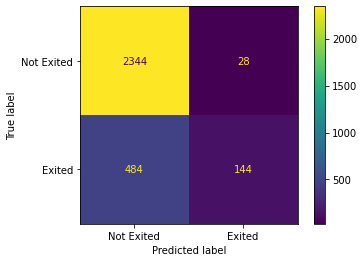

In [23]:
# Displaying Confusion Matrix for best SVM model obtained
# kernel = RBF and C = 100 

cm_display = ConfusionMatrixDisplay.from_estimator(
             svc_rbf3, X_test, y_test,
             display_labels=['Not Exited','Exited'])
plt.show()

In [41]:
# Taking user input for prediction

X_ip = list(map(float,
       input("Enter Age, Geography_Germany, isActiveMember, Balance, Gender : ")
                .split()))[:5]
X_test = X_test.reset_index(drop=True)
X_test[['Age','Balance']] = scaler.inverse_transform(X_test[['Age','Balance']])
X_test.loc[len(X_test.index)] = X_ip
X_test[['Age','Balance']] = scaler.transform(X_test[['Age','Balance']])
print('Predicted class : ',svc_rbf3.predict(X_test.iloc[[-1]])[0])
X_test.drop(index=X_test.index[-1], axis=0,inplace=True)

Enter Age, Geography_Germany, isActiveMember, Balance, Gender : 36 0 1 57000 1
Predicted class :  0


### Conclusion : Best SVM Model Obtained via kernel=RBF and C=10 (or C=100), with 84% accuracy on training set and 83% accuracy on test set 